<a href="https://colab.research.google.com/github/carloshernangarrido/pandas_practice/blob/main/pandas_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Based on https://www.machinelearningplus.com/python/101-pandas-exercises-python/
import pandas as pd
import numpy as np

# 2. How to create a series from a list, numpy array and dict?

Create a pandas series from each of the items below: a list, numpy and a dictionary

In [2]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [3]:
s_mylist = pd.Series(data=mylist)
s_myarr = pd.Series(data=myarr)
s_mydict = pd.Series(data=mydict)

s_mydict.head()

a    0
b    1
c    2
e    3
d    4
dtype: int64

# 3. How to convert the index of a series into a column of a dataframe?
Difficulty Level: L1

Convert the series ser into a dataframe with its index as another column on the dataframe.


In [4]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

df = pd.DataFrame(data=ser)
df['index'] = df.index
df.index = myarr
df.head()



,0,index
0,0,a
1,1,b
2,2,c
3,3,e
4,4,d


In [5]:
df = ser.to_frame().reset_index()
df.head()



,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# 4. How to combine many series to form a dataframe?
Difficulty Level: L1

Combine ser1 and ser2 to form a dataframe.

In [6]:
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [7]:
df = pd.DataFrame(data={'ser1': ser1, 'ser2': ser2})
df.head()

,ser1,ser2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [8]:
df = pd.concat([ser1, ser2], axis=1)
df.columns = ['ser1', 'ser2']
df.head()

,ser1,ser2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# 5. How to assign name to the series’ index?
Difficulty Level: L1
Give a name to the series ser calling it ‘alphabets’.

In [9]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))


In [10]:
print(ser.head())
ser.name = 'alphabets'
print(ser.head())

0    a
1    b
2    c
3    e
4    d
dtype: object
0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object


# 6. How to get the items of series A not present in series B?
Difficulty Level: L2

From ser1 remove items present in ser2

In [11]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [12]:
indices1 = list(ser1.index)
ser2_list = list(ser2)
print(indices1)
indices1_remove = [i for i in indices1 if ser1[i] in ser2_list]
print(indices1_remove)
ser1_ = ser1.drop(indices1_remove)
print(ser1)
print(ser1_)

[0, 1, 2, 3, 4]
[3, 4]
0    1
1    2
2    3
3    4
4    5
dtype: int64
0    1
1    2
2    3
dtype: int64


In [13]:
ser1_in_ser2 = ser1.isin(ser2)
print(ser1_in_ser2)
print(~ser1_in_ser2)
ser1_ = ser1[~ser1_in_ser2]
print(ser1_)
ser1_ = ser1.drop(np.where(ser1_in_ser2)[0])
print(ser1_)

0    False
1    False
2    False
3     True
4     True
dtype: bool
0     True
1     True
2     True
3    False
4    False
dtype: bool
0    1
1    2
2    3
dtype: int64
0    1
1    2
2    3
dtype: int64


# 7. How to get the items not common to both series A and series B?
Difficulty Level: L2
Get all items of ser1 and ser2 not common to both.


In [14]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [15]:
ser1_notin_ser2 = ser1[~ser1.isin(ser2)]
ser2_notin_ser1 = ser2[~ser2.isin(ser1)]
print(ser1_notin_ser2, ser2_notin_ser1, sep='\n')
ser_notcommon_ = pd.concat([ser1_notin_ser2, ser2_notin_ser1])
print(ser_notcommon_)
ser_notcommon = ser_notcommon_.reset_index().drop('index', axis=1)
print(ser_notcommon)

0    1
1    2
2    3
dtype: int64
2    6
3    7
4    8
dtype: int64
0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64
   0
0  1
1  2
2  3
3  6
4  7
5  8


In [16]:
ser_u = pd.Series(np.union1d(ser1, ser2))  # union
ser_i = pd.Series(np.intersect1d(ser1, ser2))  # intersect
ser_notcommon = ser_u[~ser_u.isin(ser_i)]
print(ser_notcommon)

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64


# 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?
Difficuty Level: L2

Compute the minimum, 25th percentile, median, 75th, and maximum of ser.


In [17]:
ser = pd.Series(np.random.normal(10, 5, 25))

In [18]:
# print(ser.describe())
stats = ['min', '25%', '50%', '75%', 'max']
for stat in stats:
  print(stat, ': ', ser.describe()[stat], '\n')

min :  2.6642093949434456 

25% :  6.000615550458412 

50% :  9.160218909602827 

75% :  12.154313385056376 

max :  17.48477778731835 



In [19]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 2.66420939,  6.00061555,  9.16021891, 12.15431339, 17.48477779])

# 9. How to get frequency counts of unique items of a series?
Difficulty Level: L1

Calculte the frequency counts of each unique value ser.

In [20]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

a    6
h    6
d    6
e    5
g    3
b    2
f    1
c    1
dtype: int64

# 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?
Difficulty Level: L2

From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.


In [21]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser

0     2
1     3
2     4
3     1
4     2
5     1
6     3
7     2
8     1
9     2
10    4
11    4
dtype: int64

In [22]:
counts = ser.value_counts(sort=True, ascending=False)
top2 = counts.index[0:2]
print(top2)
ser_ = ser.where((ser == top2[0]) | (ser == top2[1]), other='Other')
ser_

Int64Index([2, 4], dtype='int64')


0         2
1     Other
2         4
3     Other
4         2
5     Other
6     Other
7         2
8     Other
9         2
10        4
11        4
dtype: object

In [23]:
ser_ = ser.copy()
bool_indices = ~ser_.isin(ser.value_counts(sort=True, ascending=False).index[0:2])
print(bool_indices, end='\n\n')
ser_[bool_indices] = 'Other'
print(ser_)

0     False
1      True
2     False
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
11    False
dtype: bool

0         2
1     Other
2         4
3     Other
4         2
5     Other
6     Other
7         2
8     Other
9         2
10        4
11        4
dtype: object


# 11. How to bin a numeric series to 10 groups of equal size?
Difficulty Level: L2

Bin the series ser into 10 equal deciles and replace the values with the bin name.


In [24]:
ser = pd.Series(np.random.random(20))
ser

0     0.473460
1     0.877868
2     0.157739
3     0.828695
4     0.794368
5     0.881682
6     0.514763
7     0.753956
8     0.493113
9     0.939057
10    0.049868
11    0.647935
12    0.284030
13    0.268366
14    0.079061
15    0.017999
16    0.220520
17    0.494071
18    0.953692
19    0.504926
dtype: float64

In [25]:
ser_ = pd.qcut(ser, 10, labels=[f'#{i+1}' for i in range(10)])
ser_

0      #4
1      #9
2      #2
3      #8
4      #8
5      #9
6      #6
7      #7
8      #5
9     #10
10     #1
11     #7
12     #4
13     #3
14     #2
15     #1
16     #3
17     #5
18    #10
19     #6
dtype: category
Categories (10, object): ['#1' < '#2' < '#3' < '#4' ... '#7' < '#8' < '#9' < '#10']

In [26]:
pd.qcut(ser, q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])

0      4th
1      9th
2      2nd
3      8th
4      8th
5      9th
6      6th
7      7th
8      5th
9     10th
10     1st
11     7th
12     4th
13     3rd
14     2nd
15     1st
16     3rd
17     5th
18    10th
19     6th
dtype: category
Categories (10, object): ['1st' < '2nd' < '3rd' < '4th' ... '7th' < '8th' < '9th' < '10th']

# 12. How to convert a numpy array to a dataframe of given shape? (L1)
Difficulty Level: L1

Reshape the series ser into a dataframe with 7 rows and 5 columns


In [27]:
ser = pd.Series(np.random.randint(1, 10, 35))
ser.head()

0    4
1    2
2    4
3    9
4    2
dtype: int64

In [28]:
df = pd.DataFrame(ser.values.reshape((7, 5)))
df.head()

,0,1,2,3,4
0,4,2,4,9,2
1,5,2,1,5,8
2,5,9,6,9,1
3,2,6,3,8,2
4,2,3,6,8,7


# 13. How to find the positions of numbers that are multiples of 3 from a series?
Difficulty Level: L2

Find the positions of numbers that are multiples of 3 from ser.


In [29]:
ser = pd.Series(np.random.randint(1, 10, 7))
ser

0    2
1    8
2    9
3    9
4    7
5    5
6    4
dtype: int64

In [30]:
[i for i in ser.index if ser[i] % 3 == 0]

[2, 3]

In [31]:
df = pd.DataFrame(ser)
df['is_multiple_of_3'] = df[0].apply(lambda x: x % 3 == 0)
df

,0,is_multiple_of_3
0,2,False
1,8,False
2,9,True
3,9,True
4,7,False
5,5,False
6,4,False


In [32]:
# Incorrect solution in 101 webpage
# ser = pd.Series(np.random.randint(1, 10, 7))
# ser

# # Solution
# print(ser)
# np.argwhere(ser % 3==0)

# 14. How to extract items at given positions from a series
Difficulty Level: L1

From ser, extract the items at positions in list pos.


In [33]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]
ser.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [34]:
ser[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [35]:
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

# 15. How to stack two series vertically and horizontally ?
Difficulty Level: L1

Stack ser1 and ser2 vertically and horizontally (to form a dataframe).


In [36]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))
print(ser1)
print(ser2)

0    0
1    1
2    2
3    3
4    4
dtype: int64
0    a
1    b
2    c
3    d
4    e
dtype: object


In [37]:
ser_vert = pd.concat([ser1, ser2], axis=0)
print(ser_vert, type(ser_vert))
ser_hor = pd.concat([ser1, ser2], axis=1)
print(ser_hor, type(ser_hor))

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object <class 'pandas.core.series.Series'>
   0  1
0  0  a
1  1  b
2  2  c
3  3  d
4  4  e <class 'pandas.core.frame.DataFrame'>


In [38]:
# Output
# Vertical
ser_vert = ser1.append(ser2)
print(ser_vert)

# Horizontal
df = pd.concat([ser1, ser2], axis=1)
print(df)

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object
   0  1
0  0  a
1  1  b
2  2  c
3  3  d
4  4  e


# 16. How to get the positions of items of series A in another series B?
Difficulty Level: L2

Get the positions of items of ser2 in ser1 as a list.

In [39]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13, 99])

In [40]:
list_pos = [pd.Index(ser1).get_loc(item2) for item2 in ser2 if item2 in ser1.values]
list_pos

[5, 4, 0, 8]

# 17. How to compute the mean squared error on a truth and predicted series?
Difficulty Level: L2

Compute the mean squared error of truth and pred series.

In [41]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)
print(truth, '\n', pred)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64 
 0    0.280012
1    1.498574
2    2.233020
3    3.580509
4    4.344578
5    5.535191
6    6.755413
7    7.649075
8    8.318565
9    9.947609
dtype: float64


In [42]:
np.sum((truth - pred)**2)/len(truth)

0.3114829567494401

In [43]:
((truth - pred)**2).describe()['mean']

0.3114829567494401

# 18. How to convert the first character of each element in a series to uppercase?
Difficulty Level: L2

Change the first character of each word to upper case in each word of ser.




In [44]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [45]:
ser_ = ser.apply(lambda x: x.title())
ser_

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [46]:
ser_ = pd.Series(((' '.join(ser)).title()).split(' '))
ser_

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [47]:
# Solution 3
ser_ = pd.Series([i.title() for i in ser])
ser_

0     How
1      To
2    Kick
3    Ass?
dtype: object

# 19. How to calculate the number of characters in each word in a series?
Difficulty Level: L2

In [48]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [49]:
ser_count = ser.apply(lambda x: len(x))
ser_count

0    3
1    2
2    4
3    4
dtype: int64

# 20. How to compute difference of differences between consequtive numbers of a series?
Difficulty Level: L1

Difference of differences between the consequtive numbers of ser.


In [50]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [51]:
list(ser.diff().diff())

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

In [52]:
ser.diff().diff().tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

# 21. How to convert a series of date-strings to a timeseries?
Difficiulty Level: L2


In [53]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [54]:
import dateutil as du

ser_time = ser.apply(lambda item: du.parser.parse(item))
ser_time

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [55]:
ser_time = pd.to_datetime(ser)
ser_time

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

# 22. How to get the day of month, week number, day of year and day of week from a series of date strings?
Difficiulty Level: L2

Get the day of month, week number, day of year and day of week from ser.


In [56]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [57]:
tser = pd.to_datetime(ser)

day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

day_of_month = tser.dt.day.to_list()

week_number = tser.dt.weekofyear.to_list()

day_of_year = tser.dt.day_of_year.to_list()

day_of_week = [day_names[i] for i in tser.dt.weekday.to_list()]

print(day_of_month, week_number, day_of_year, day_of_week, sep='\n\n')

[1, 2, 3, 4, 5, 6]

[53, 5, 9, 14, 19, 23]

[1, 33, 63, 94, 125, 157]

['fri', 'wed', 'sat', 'thu', 'mon', 'sat']


<ipython-input-57-b298e588fc65>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week_number = tser.dt.weekofyear.to_list()


# 23. How to convert year-month string to dates corresponding to the 4th day of the month?
Difficiulty Level: L2

Change ser to dates that start with 4th of the respective months.

In [58]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

In [59]:
ser_dt = pd.to_datetime(ser)
ser_dt = ser_dt.apply(lambda x: x.replace(day=4))
ser_dt

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [60]:
from dateutil.parser import parse
ser_dt = ser.map(lambda x: parse('04 ' + x))
ser_dt

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

# 24. How to filter words that contain atleast 2 vowels from a series?
Difficiulty Level: L3

From ser, extract words that contain atleast 2 vowels.


In [61]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

In [62]:
vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']

def n_vowels(st):
  v = 0
  for l in st:
    if l in vowels:
      v += 1
  return v

ser_filt = ser[ser.map(n_vowels) >= 2]
ser_filt

0     Apple
1    Orange
4     Money
dtype: object

In [63]:
from collections import Counter
mask = ser.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in list('aeiou')]) >= 2)
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

# 25. How to filter valid emails from a series?
Difficiulty Level: L3

Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.

In [64]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [65]:
import re

emails_f = emails[emails.map(lambda x: re.match(pattern=pattern, string=x) is not None)]
emails_f

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [66]:
import re
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'
mask = emails.map(lambda x: bool(re.match(pattern, x)))
emails[mask]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

# 26. How to get the mean of a series grouped by another series?
Difficiulty Level: L2

Compute the mean of weights of each fruit.

In [67]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
print(weights.tolist())
print(fruit.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
['banana', 'carrot', 'banana', 'banana', 'banana', 'apple', 'banana', 'banana', 'carrot', 'banana']


In [68]:
fruit_w = weights.groupby(by=fruit).mean()
fruit_w

apple     6.000000
banana    5.428571
carrot    5.500000
dtype: float64

In [69]:
fruit_w = weights.groupby(by=fruit).mean()
fruit_w

apple     6.000000
banana    5.428571
carrot    5.500000
dtype: float64

# 27. How to compute the euclidean distance between two series?
Difficiulty Level: L2

Compute the euclidean distance between series (points) p and q, without using a packaged formula.


In [70]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [71]:
dist = np.sqrt(np.sum((p-q)**2))
dist

18.16590212458495

In [72]:
dist = (sum((p-q)**2))**(1/2)
dist

18.16590212458495

# 28. How to find all the local maxima (or peaks) in a numeric series?
Difficiulty Level: L3
Get the positions of peaks (values surrounded by smaller values on both sides) in ser.


In [73]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [74]:
peaks_ind = [i for i in range(1, len(ser)-1) if ser[i-1] < ser[i] > ser[i+1]]
peaks_ind

[1, 5, 7]

In [75]:
sign_d_ser_di = np.sign(np.diff(ser, 1, append=np.nan))
print(sign_d_ser_di)
d_sign_d_ser_di_di = np.diff(sign_d_ser_di, 1, prepend=np.nan)
print(d_sign_d_ser_di_di)
peaks_ind = np.where(d_sign_d_ser_di_di == -2)[0]
peaks_ind

[ 1. -1.  1.  1.  1. -1.  1. -1. nan]
[nan -2.  2.  0.  0. -2.  2. -2. nan]


array([1, 5, 7])

# 29. How to replace missing spaces in a string with the least frequent character?
Replace the spaces in my_str with the least frequent character.

Difficiulty Level: L2

In [76]:
my_str = 'dbc deb abed gade'

In [77]:
ser = pd.Series(list(my_str))
bins = ser.value_counts(ascending=True)
# print(bins)
least_freq = bins.index[0]
# print(least_freq)
ser_ = ser.replace(' ', least_freq)
# print(ser_)
ser_.to_string(index=False).replace('\n', '')

'dbccdebcabedcgade'

In [78]:
"".join(ser.replace(' ', least_freq))

'dbccdebcabedcgade'

# 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?
Difficiulty Level: L2

In [79]:
from numpy.random.mtrand import randint
import datetime as dt
start = dt.date(2000, 1, 1)
delta = dt.timedelta(days=7)
index = [start + i*delta for i in range(10)]
values = [randint(0,10) for i in range(10)]

ser = pd.Series(index=index, data=values)
ser

2000-01-01    8
2000-01-08    7
2000-01-15    8
2000-01-22    8
2000-01-29    5
2000-02-05    7
2000-02-12    9
2000-02-19    2
2000-02-26    8
2000-03-04    5
dtype: int64

In [80]:
ser = pd.Series(data=np.random.randint(0, 10, 10),
                index=pd.date_range(start, periods=10, freq='W-SAT'))
ser

2000-01-01    6
2000-01-08    2
2000-01-15    3
2000-01-22    7
2000-01-29    9
2000-02-05    3
2000-02-12    7
2000-02-19    0
2000-02-26    3
2000-03-04    8
Freq: W-SAT, dtype: int64

# 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?
Difficiulty Level: L2

ser has missing dates and values. Make all missing dates appear and fill up with value from previous date.


In [81]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


In [82]:
ser.resample(rule='D').ffill()

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

# 32. How to compute the autocorrelations of a numeric series?
Difficiulty Level: L3

Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

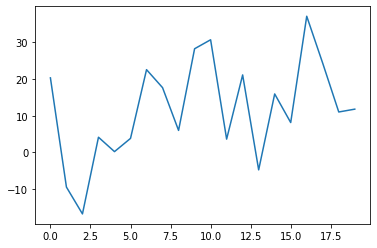

In [83]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))
ser.plot()

In [84]:
autocorrs = [ser.autocorr(lag=lag) for lag in range(10)]
autocorrs_ser = pd.Series(data=autocorrs)
print(autocorrs_ser)
autocorrs_ser = autocorrs_ser.sort_values(ascending=False)
print(autocorrs_ser)
lag_highestautocorr = autocorrs_ser.index[1]
highestautocorr = autocorrs_ser.iloc[1]
print(f"{lag_highestautocorr=} and {highestautocorr=}")

0    1.000000
1    0.201207
2    0.111984
3    0.027472
4   -0.110740
5   -0.280148
6    0.149596
7    0.096023
8   -0.324366
9    0.103126
dtype: float64
0    1.000000
1    0.201207
6    0.149596
2    0.111984
9    0.103126
7    0.096023
3    0.027472
4   -0.110740
5   -0.280148
8   -0.324366
dtype: float64
lag_highestautocorr=1 and highestautocorr=0.20120662084614233


# 33. How to import only every nth row from a csv file to create a dataframe?
Difficiulty Level: L2

Import every 50th row of BostonHousing dataset as a dataframe.

In [85]:
n = 50
df_ = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
# print(df_)
df = df_.iloc[0::50]
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4


In [86]:
# Solution 2: Use chunks and list comprehension
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.concat([chunk.iloc[0] for chunk in df], axis=1)
df2 = df2.transpose()
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


# 34. How to change column values when importing csv to a dataframe?
Difficulty Level: L2

Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df['medv'] = np.where(df['medv'] < 25, 'low', 'high')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,high
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,high
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,low


In [88]:
# Solution 1: Using converter parameter
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', 
                 converters={'medv': lambda x: 'High' if float(x) > 25 else 'Low'})
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


# 35. How to create a dataframe with rows as strides from a given series?
Difficiulty Level: L3


In [89]:
# Input

L = pd.Series(range(15))
L

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

In [90]:
L = pd.Series(range(15))

def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

# 36. How to import only specified columns from a csv file?
Difficulty Level: L1

Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df = df[['crim', 'medv']]
df

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv',
                 usecols=['crim', 'medv'])
df

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


# 37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.
Difficulty Level: L2

Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. Also get the numpy array and list equivalent of the dataframe.

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

print(f'number of rows and columns: {df.shape}')
print('Columns')
for col in df:
  print(col, ': ', f'dtype: {df[col].dtype}, \n{df[col].describe()}', '\n')

arr = df.to_numpy()
print(arr)
li = list(arr)
print(li)

number of rows and columns: (93, 27)
Columns
Manufacturer :  dtype: object, 
count       89
unique      31
top       Ford
freq         8
Name: Manufacturer, dtype: object 

Model :  dtype: object, 
count          92
unique         92
top       Integra
freq            1
Name: Model, dtype: object 

Type :  dtype: object, 
count          90
unique          6
top       Midsize
freq           22
Name: Type, dtype: object 

Min.Price :  dtype: float64, 
count    86.000000
mean     17.118605
std       8.828290
min       6.700000
25%      10.825000
50%      14.600000
75%      20.250000
max      45.400000
Name: Min.Price, dtype: float64 

Price :  dtype: float64, 
count    91.000000
mean     19.616484
std       9.724280
min       7.400000
25%      12.350000
50%      17.700000
75%      23.500000
max      61.900000
Name: Price, dtype: float64 

Max.Price :  dtype: float64, 
count    88.000000
mean     21.459091
std      10.696563
min       7.900000
25%      14.575000
50%      19.150000
75%      

# 38. How to extract the row and column number of a particular cell with given criterion?
Difficulty Level: L1

Which manufacturer, model and type has the highest Price? What is the row and column number of the cell with the highest Price value?

In [94]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
# df

In [95]:
max_price = max(df['Price'])
print(max_price)
max_price_car = df[df['Price']==max_price]
print(f"{max_price_car['Manufacturer'].iloc[0]=}")
print(f"{max_price_car['Model'].iloc[0]=}")
print(f"{max_price_car['Type'].iloc[0]=}")
print(f"row number: {max_price_car['Manufacturer'].index[0]}")

61.9
max_price_car['Manufacturer'].iloc[0]='Mercedes-Benz'
max_price_car['Model'].iloc[0]='300E'
max_price_car['Type'].iloc[0]='Midsize'
row number: 58


In [96]:
max_price = max(df['Price'])
print(max_price)
max_price_car = df.loc[df.Price==max_price]
print(f"{max_price_car['Manufacturer'].iloc[0]=}")
print(f"{max_price_car['Model'].iloc[0]=}")
print(f"{max_price_car['Type'].iloc[0]=}")

61.9
max_price_car['Manufacturer'].iloc[0]='Mercedes-Benz'
max_price_car['Model'].iloc[0]='300E'
max_price_car['Type'].iloc[0]='Midsize'


# 39. How to rename a specific columns in a dataframe?
Difficulty Level: L2

Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’.


In [97]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


In [98]:
# Step 1
df.rename(columns={'Type': 'CarType'}, inplace=True)
print(df.columns)

# Step 2
for i_col, _ in enumerate(df.columns):
  df.rename(columns={df.columns[i_col]: df.columns[i_col].replace('.', '_')}, 
            inplace=True)

print(df.columns)


Index(['Manufacturer', 'Model', 'CarType', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')
Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


In [99]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.columns)
# Step 1
df.rename(columns={'Type': 'CarType'}, inplace=True)
print(df.columns)
# Step 2
df.columns = df.columns.map(lambda x: x.replace('.', '_'))
print(df.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')
Index(['Manufacturer', 'Model', 'CarType', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')
Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 

# 40. How to check if a dataframe has any missing values?
Difficulty Level: L1

Check if df has any missing values.



In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
if df.isnull().values.any():
  print('There is at least one missing value')
else:
  print('There are not missing values')

There is at least one missing value


# 41. How to count the number of missing values in each column?
Difficulty Level: L2

Count the number of missing values in each column of df. Which column has the maximum number of missing values?


In [135]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
# print('Mising values in each column:')
quantities = []
for col in df.isnull():
  qt = df.isnull()[col].value_counts()[True]
  quantities.append(qt)
  # print(col, '\n', qt, '\n')
col_max_missing = np.argmax(quantities)
print(f'The column with more missing values is: {df.columns[col_max_missing]}')

The column with more missing values is: Luggage.room


# 42. How to replace missing values of multiple numeric columns with the mean?
Difficulty Level: L2

Replace missing values in Min.Price and Max.Price columns with their respective mean.

In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
mean_max_price = df['Max.Price'].mean()
mean_min_price = df['Min.Price'].mean()

print(df.head())
df['Max.Price'][np.isnan(df['Max.Price'])] = mean_max_price
df['Min.Price'][np.isnan(df['Min.Price'])] = mean_min_price
print('***********************')
print(df.head())

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8      25.0   
1          NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2         Audi       90  Compact       25.9   29.1       32.3      20.0   
3         Audi      100  Midsize        NaN   37.7       44.6      19.0   
4          BMW     535i  Midsize        NaN   30.0        NaN      22.0   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0         31.0                None      Front  ...        5.0   177.0   
1         25.0  Driver & Passenger      Front  ...        5.0   195.0   
2         26.0         Driver only      Front  ...        5.0   180.0   
3         26.0  Driver & Passenger        NaN  ...        6.0   193.0   
4         30.0                 NaN       Rear  ...        4.0   186.0   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0      102.0   68.0         37.0     

<ipython-input-175-a375dd1accb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max.Price'][np.isnan(df['Max.Price'])] = mean_max_price
<ipython-input-175-a375dd1accb4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min.Price'][np.isnan(df['Min.Price'])] = mean_min_price


In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

print(df.head())
df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x: x.fillna(x.mean()))

print('***********************')
print(df.head())



  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8      25.0   
1          NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2         Audi       90  Compact       25.9   29.1       32.3      20.0   
3         Audi      100  Midsize        NaN   37.7       44.6      19.0   
4          BMW     535i  Midsize        NaN   30.0        NaN      22.0   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0         31.0                None      Front  ...        5.0   177.0   
1         25.0  Driver & Passenger      Front  ...        5.0   195.0   
2         26.0         Driver only      Front  ...        5.0   180.0   
3         26.0  Driver & Passenger        NaN  ...        6.0   193.0   
4         30.0                 NaN       Rear  ...        4.0   186.0   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0      102.0   68.0         37.0     

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

print(df.head())
df['Min.Price'] = df['Min.Price'].fillna(df['Min.Price'].mean())

print('***********************')
print(df.head())

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8      25.0   
1          NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2         Audi       90  Compact       25.9   29.1       32.3      20.0   
3         Audi      100  Midsize        NaN   37.7       44.6      19.0   
4          BMW     535i  Midsize        NaN   30.0        NaN      22.0   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0         31.0                None      Front  ...        5.0   177.0   
1         25.0  Driver & Passenger      Front  ...        5.0   195.0   
2         26.0         Driver only      Front  ...        5.0   180.0   
3         26.0  Driver & Passenger        NaN  ...        6.0   193.0   
4         30.0                 NaN       Rear  ...        4.0   186.0   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0      102.0   68.0         37.0     